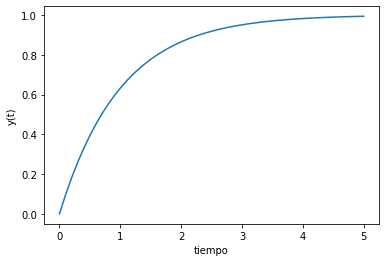

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Funcion que retorna dy/dt
def model(y,t):
    dydt = -y + 1.0
    return dydt

# Condicion inicial 
y0 = 0

# Puntos en el tiempo 
t = np.linspace(0,5)

# Resolver EDO
y = odeint(model,y0,t)

# Graficacion de resultados
plt.plot(t,y)
plt.xlabel('tiempo')
plt.ylabel('y(t)')
plt.show()

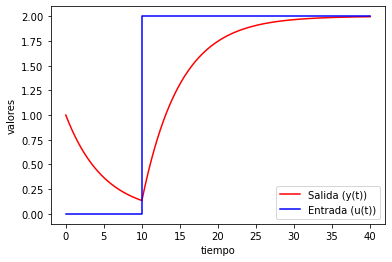

In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Funcion que retorna dy/dt
def model(y,t):
    # u pasos de 0 para 2 a t=10
    if t<10.0:
        u = 0
    else:
        u = 2
    dydt = (-y + u)/5.0
    return dydt

# Condicion inicial 
y0 = 1

# Puntos en el tiempo 
t = np.linspace(0,40,1000)

# Resolver EDO 
y = odeint(model,y0,t)

# Graficacion de resultados
plt.plot(t,y,'r-',label='Salida (y(t))')
plt.plot([0,10,10,40],[0,0,2,2],'b-',label='Entrada (u(t))')
plt.ylabel('valores')
plt.xlabel('tiempo')
plt.legend(loc='best')
plt.show()

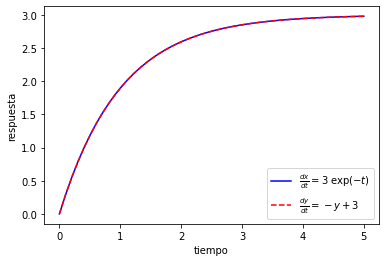

In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Funcion que retorna dz/dt
def model(z,t):
    dxdt = 3.0 * np.exp(-t)
    dydt = -z[1] + 3
    dzdt = [dxdt,dydt]
    return dzdt

# Condicion inicial 
z0 = [0,0]

# Puntos en el tiempo 
t = np.linspace(0,5)

# Resolver EDO 
z = odeint(model,z0,t)

# Graficacion de resultados 
plt.plot(t,z[:,0],'b-',label=r'$\frac{dx}{dt}=3 \; \exp(-t)$')
plt.plot(t,z[:,1],'r--',label=r'$\frac{dy}{dt}=-y+3$')
plt.ylabel('respuesta')
plt.xlabel('tiempo')
plt.legend(loc='best')
plt.show()

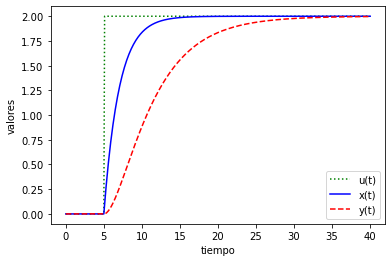

In [7]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Funcion que retorna dz/dt
def model(z,t,u):
    x = z[0]
    y = z[1]
    dxdt = (-x + u)/2.0
    dydt = (-y + x)/5.0
    dzdt = [dxdt,dydt]
    return dzdt

# Condicion inicial 
z0 = [0,0]

# Cantidad de numeros en el tiempo 
n = 401

# Numeros en el tiempo 
t = np.linspace(0,40,n)

# Paso de entrada 
u = np.zeros(n)
# Cambiar de 2.0 a tiempo = 5.0
u[51:] = 2.0

# Almacen de solucion 
x = np.empty_like(t)
y = np.empty_like(t)
# Inicializar condiciones iniciales 
x[0] = z0[0]
y[0] = z0[1]

# Resolver EDO 
for i in range(1,n):
    # Lapso para el paso siguiente 
    tspan = [t[i-1],t[i]]
    # Resolver el siguente paso 
    z = odeint(model,z0,tspan,args=(u[i],))
    # Almacen de solucion para graficar 
    x[i] = z[1][0]
    y[i] = z[1][1]
    # Siguiente condicion inicial 
    z0 = z[1]

# Graficacion de resultados 
plt.plot(t,u,'g:',label='u(t)')
plt.plot(t,x,'b-',label='x(t)')
plt.plot(t,y,'r--',label='y(t)')
plt.ylabel('valores')
plt.xlabel('tiempo')
plt.legend(loc='best')
plt.show()